In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# List all files in data dir
image_paths = glob.glob("data/*")
print(image_paths)

image_path = "data/catdog.png"

['data\\catdog.jpg', 'data\\catdog.png']


In [2]:
image = cv2.imread(image_path)
image

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [3]:
image.shape


(1091, 920, 3)

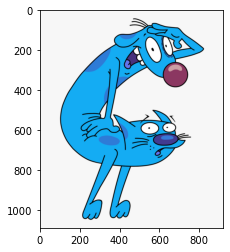

In [4]:
plt.imshow(image)
plt.show()

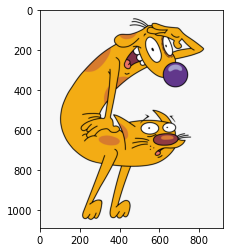

In [5]:
rgb_image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

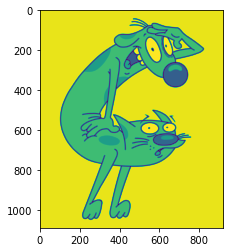

In [6]:
gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray) 
plt.show()

In [7]:
gray

array([[247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       ...,
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247],
       [247, 247, 247, ..., 247, 247, 247]], dtype=uint8)

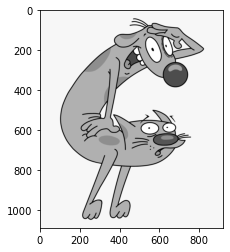

In [8]:
plt.imshow(gray, cmap='gray')
plt.show()

In [9]:
manual_gray = image.mean(axis=2)

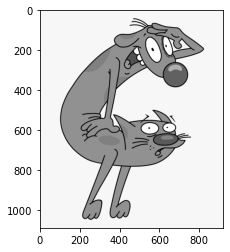

In [10]:
plt.imshow(manual_gray, cmap='gray')
plt.show()

In [11]:
image.dtype

dtype('uint8')

In [12]:
def imshow_cv2plt(brg_img):
    rgb_image =cv2.cvtColor(brg_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.show()

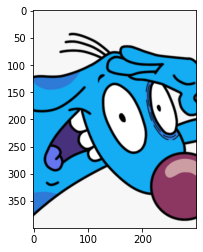

In [13]:
cropped = image[:400,400:700]
plt.imshow(cropped)

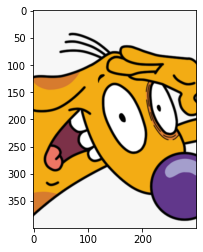

In [14]:
imshow_cv2plt(cropped)

In [15]:
cv2.resize(image, (200, 100)).shape

(100, 200, 3)

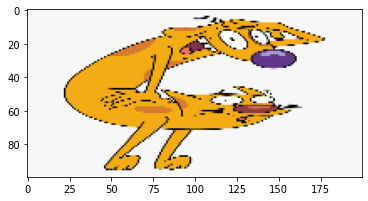

In [16]:
resized = cv2.resize(image, (200, 100))
imshow_cv2plt(resized)

In [17]:
h, w = image.shape[:2]
(h,w)

(1091, 920)

In [18]:
ar= w/h
ar

0.843263061411549

In [19]:
new_w=None
new_h=100

def resize(img, width=None, height=None):
    h, w = img.shape[:2]

    if width is not None and height is not None:
        pass
    elif width is not None:
        height = width * (h / w)
        height = round(height)
    elif height is not None:
        width = height * (w / h)
        width = round(width)
    else:
        raise ValueError("No dimensions provided")

    resized = cv2.resize(image, (width, height))
    return resized
                
                


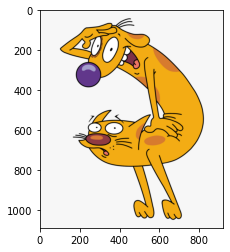

In [20]:
flipped = cv2.flip(image, 1)
imshow_cv2plt(flipped)

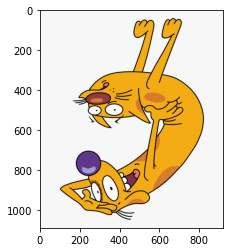

In [21]:
flipped2 = cv2.flip(image, -1)
imshow_cv2plt(flipped2)

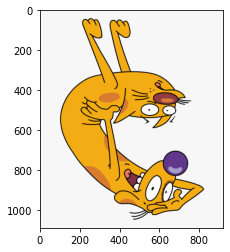

In [22]:
flipped3 = cv2.flip(image, 0)
imshow_cv2plt(flipped3)

<function matplotlib.pyplot.show(*args, **kw)>

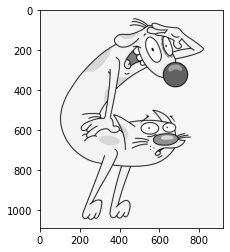

In [23]:
b,g,r = cv2.split(image)
plt.imshow(r, cmap='gray')
plt.show

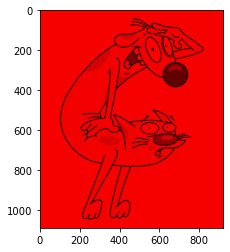

In [24]:
red = image.copy()
red[:,:,:2]=0
imshow_cv2plt(red)

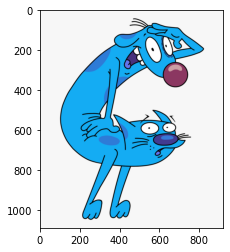

In [25]:
plt.imshow(image)

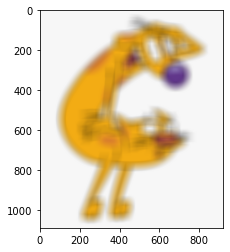

In [26]:
blurred = cv2.blur(image, (50,50))
imshow_cv2plt(blurred)

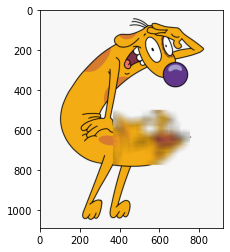

In [27]:
image[500:775, 365:750] =cv2.blur(image[500:775, 365:750], (50,50))
imshow_cv2plt(image)

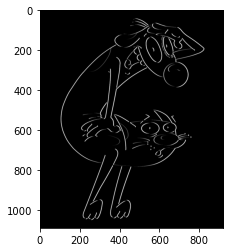

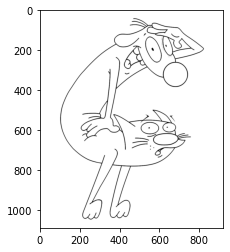

In [30]:
image = cv2.imread(image_path)

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_y = np.array([[-1,2,-1],
                    [0,0,0],
                    [1,2,1]])

gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

x_edges = cv2.filter2D(gray, -1, sobel_x)

gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
y_edges = cv2.filter2D(gray, -1, sobel_y)

imshow_cv2plt(x_edges)
imshow_cv2plt(y_edges)

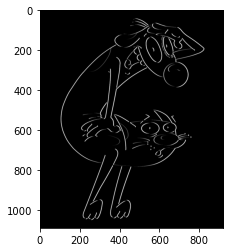

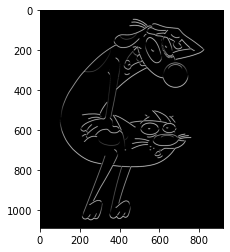

In [32]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])
# fmt: on

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x_edges = cv2.filter2D(gray, -1, sobel_x)

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
y_edges = cv2.filter2D(gray, -1, sobel_y)

imshow_cv2plt(x_edges)
imshow_cv2plt(y_edges)

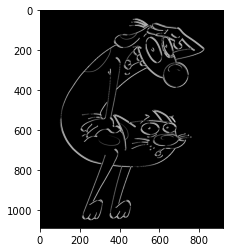

In [33]:
edges = x_edges + y_edges
imshow_cv2plt(edges)

In [35]:
_, threshold_x_edges = cv2(edges, 127, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshold_x_edges)

TypeError: 'module' object is not callable

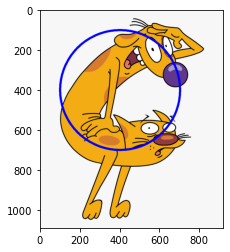

In [40]:
image = cv2.imread(image_path)
cv2.circle(image, (400,400), 300, (255,0,0), 10)
imshow_cv2plt(image)

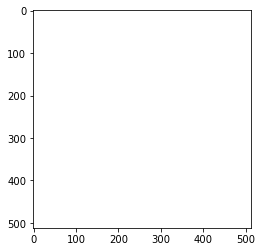

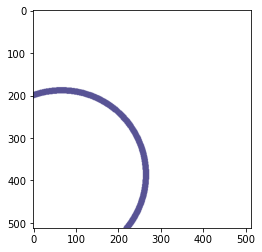

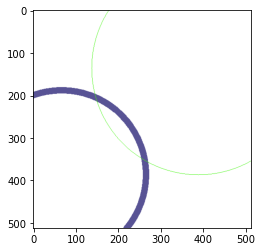

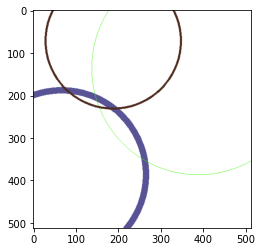

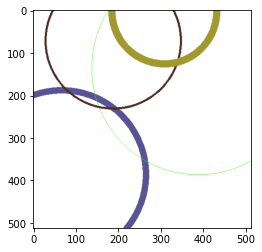

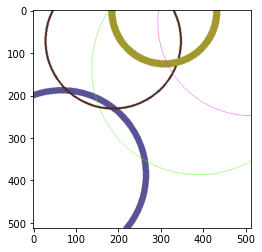

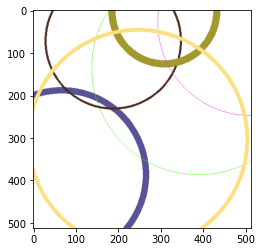

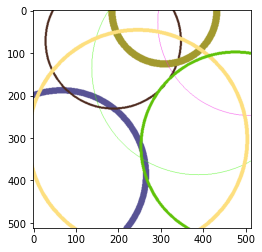

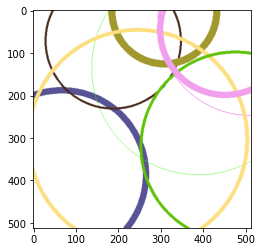

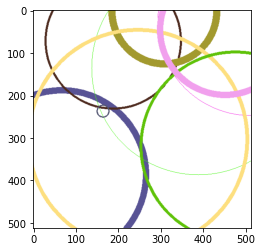

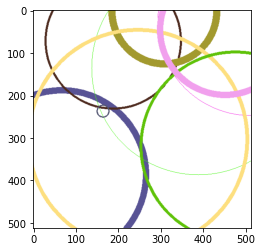

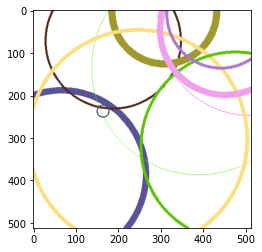

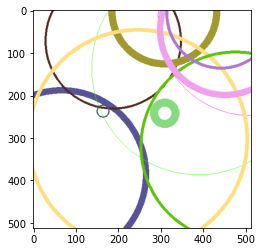

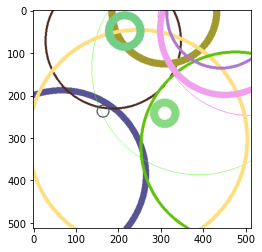

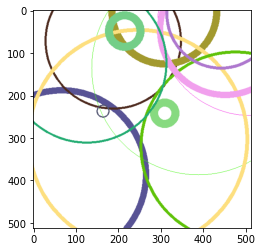

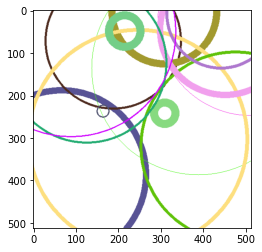

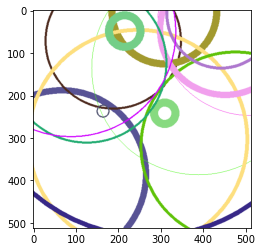

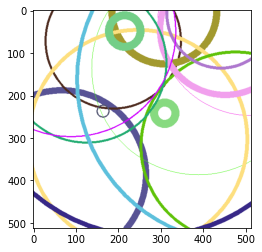

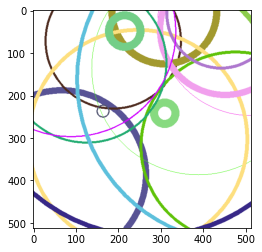

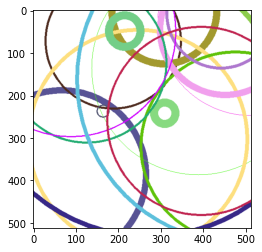

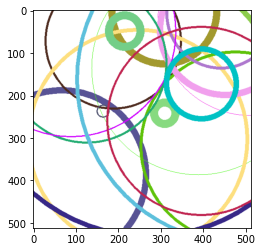

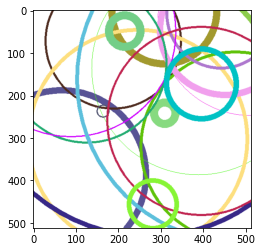

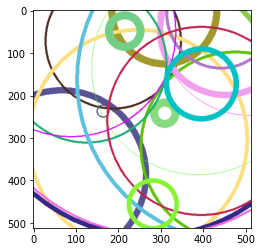

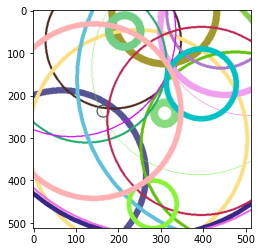

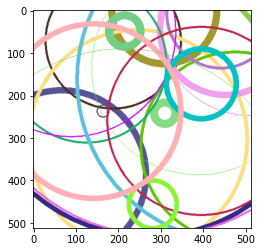

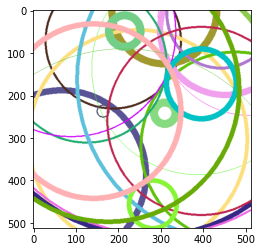

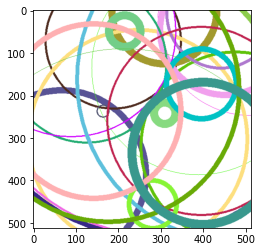

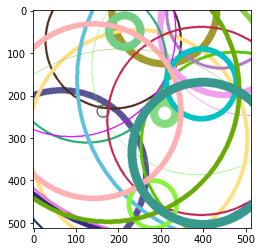

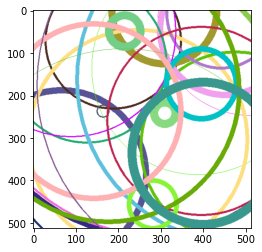

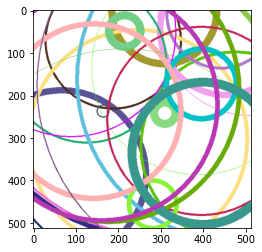

In [48]:
import random

w = 512
canvas = 255 * np.ones((w, w, 3), dtype="uint8")
n_circles = 30

# generate 'art'
for i in range(n_circles):
    # pick a random point
    x = random.randint(0, w)
    y = random.randint(0, w)

    # pick a random color
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)

    # pick a random radius and thickness
    radius = random.randint(10, 500)
    thickness = random.randint(0, 20)

    cv2.circle(canvas, (x, y), radius, (b, g, r), thickness)
    imshow_cv2plt(canvas)

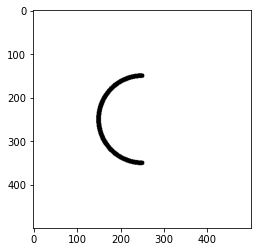

In [77]:
w = 500
h = 500



canvas2 = 255 * np.ones((w, h, 3), dtype="uint8")

    
# Ellipse parameters
radius = 100
center = (w // 2, h // 2)
axes = (radius, radius)
angle = 0
start_angle = 90
#start_angle = 270
end_angle = 270
thickness = 10
color =(0, 0, 0)

cv2.ellipse(canvas2, center, axes, angle, start_angle, end_angle, color, thickness, lineType=-1, shift=0) 
imshow_cv2plt(canvas2)

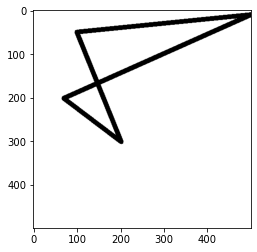

In [81]:
w = 500
h = 500

canvas3 = 255 * np.ones((w, h, 3), dtype="uint8")

thickness = 10
color =(0, 0, 0)
is_closed= True
pts = np.array([[100,50],[202,302],[70,202],[500,10]])

cv2.polylines(canvas3, [pts], is_closed, color, thickness,  shift=0) 
imshow_cv2plt(canvas3)

In [ ]:
w = 500
h = 500

canvas4 = 255 * np.ones((w, h, 3), dtype="uint8")

pts = np.array([[100,50],[202,302],[70,202],[500,10]])

cv2.fillPoly(canvas4, pts, color, lineType, shift, offset=0
imshow_cv2plt(canvas4)